# *   **Nama : Brilly Lutfan Qasthari**
# *   **Email : brilly.lutfan@gmail.com**
# *   **Alamat : Yogyakarta**



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

In [ ]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"brillyskripsi","key":"2fe52460b9aa64f09bb59e1efae7840c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d hgultekin/bbcnewsarchive

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 155MB/s]


In [ ]:
!unzip -qq bbcnewsarchive.zip -d dataset

In [ ]:
import pandas as pd

df = pd.read_csv("/content/dataset/bbc-news-data.csv", sep="\t")

In [ ]:
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


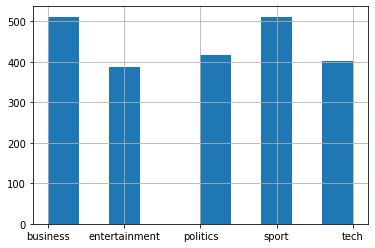

In [ ]:
df["category"].hist()

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,category,filename,title,content
0,sport,035.txt,Collins banned in landmark case,Sprinter Michelle Collins has received an eig...
1,sport,075.txt,Gardener wins double in Glasgow,Britain's Jason Gardener enjoyed a double 60m...
2,business,501.txt,Water firm Suez in Argentina row,A conflict between the Argentine State and wa...
3,business,470.txt,Saudi investor picks up the Savoy,London's famous Savoy hotel has been sold to ...
4,sport,406.txt,Fuming Robinson blasts officials,"England coach Andy Robinson said he was ""livi..."
...,...,...,...,...
2220,business,272.txt,Markets signal Brazilian recovery,The Brazilian stock market has risen to a rec...
2221,business,361.txt,US consumer confidence up,Consumers' confidence in the state of the US ...
2222,sport,484.txt,Sydney return for Henin-Hardenne,Olympic champion Justine Henin-Hardenne will ...
2223,business,253.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...


In [ ]:
print(df.head())
print('\nShape of data is {}\n'.format(df.shape))
print(df.info())

   category filename                              title  \
0     sport  035.txt    Collins banned in landmark case   
1     sport  075.txt    Gardener wins double in Glasgow   
2  business  501.txt   Water firm Suez in Argentina row   
3  business  470.txt  Saudi investor picks up the Savoy   
4     sport  406.txt   Fuming Robinson blasts officials   

                                             content  
0   Sprinter Michelle Collins has received an eig...  
1   Britain's Jason Gardener enjoyed a double 60m...  
2   A conflict between the Argentine State and wa...  
3   London's famous Savoy hotel has been sold to ...  
4   England coach Andy Robinson said he was "livi...  

Shape of data is (2225, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_new = df.drop(columns=['filename'])
df_new

,category,title,content
0,sport,Collins banned in landmark case,Sprinter Michelle Collins has received an eig...
1,sport,Gardener wins double in Glasgow,Britain's Jason Gardener enjoyed a double 60m...
2,business,Water firm Suez in Argentina row,A conflict between the Argentine State and wa...
3,business,Saudi investor picks up the Savoy,London's famous Savoy hotel has been sold to ...
4,sport,Fuming Robinson blasts officials,"England coach Andy Robinson said he was ""livi..."
...,...,...,...
2220,business,Markets signal Brazilian recovery,The Brazilian stock market has risen to a rec...
2221,business,US consumer confidence up,Consumers' confidence in the state of the US ...
2222,sport,Sydney return for Henin-Hardenne,Olympic champion Justine Henin-Hardenne will ...
2223,business,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...


In [ ]:
category = pd.get_dummies(df_new.category)
df_new_cat = pd.concat([df_new, category], axis=1)
df_new_cat = df_new_cat.drop(columns='category')
df_new_cat.head(10)

,title,content,business,entertainment,politics,sport,tech
0,Collins banned in landmark case,Sprinter Michelle Collins has received an eig...,0,0,0,1,0
1,Gardener wins double in Glasgow,Britain's Jason Gardener enjoyed a double 60m...,0,0,0,1,0
2,Water firm Suez in Argentina row,A conflict between the Argentine State and wa...,1,0,0,0,0
3,Saudi investor picks up the Savoy,London's famous Savoy hotel has been sold to ...,1,0,0,0,0
4,Fuming Robinson blasts officials,"England coach Andy Robinson said he was ""livi...",0,0,0,1,0
5,China 'ripe' for media explosion,Asia is set to drive global media growth to 2...,0,0,0,0,1
6,Brits return Keane to number one,Brits success has helped return Keane's award...,0,1,0,0,0
7,Gerrard happy at Anfield,Liverpool captain Steven Gerrard has reiterat...,0,0,0,1,0
8,Barclays profits hit record level,"Barclays, the UK's third-biggest bank, has se...",1,0,0,0,0
9,Singer Knight backs anti-gun song,R&B star Beverley Knight said she sang on an ...,0,1,0,0,0


In [ ]:
content = []
labels = []

for label in df_new_cat[['business', 'entertainment', 'politics', 'sport', 'tech']].values:
    labels.append(label)
    
for con in df_new_cat['title'].values + '' + df_new_cat['content'].values:
    for word in stopwords:
        token = " " + word + " "
        con = con.replace(token, " ")
        con = con.replace(" ", " ")
    content.append(con)

print(len(content))
print(len(labels))
print("\nContent:", content[0])
print("\nLabel:", labels[0])

2225
2225

Content: Collins banned landmark case Sprinter Michelle Collins received eight-year ban doping offences hearing North American Court Arbitration Sport (CAS).  America's former world indoor 200m champion first athlete suspended without positive drugs test admission drugs use. Collins' ban result connection federal inquiry Balco doping scandal. The 33-year-old found guilty using performance-enhancing drugs. The US Anti-Doping Agency (USADA) decided press charges Collins summer. The sprinter consistently protested innocence CAS upheld USADA's findings. "The USADA proved, beyond reasonable doubt, Collins took EPO, testosterone/epitestosterone cream THG," said CAS statement. "Collins used substances enhance performance elude drug testing available time." So far total 13 athletes sanctioned violations involving drugs associated Balco doping scandal. World record holder Tim Montgomery also facing lifetime ban charged USADA. His hearing CSA rescheduled June next year.  Drug enforcem

In [ ]:
from sklearn.model_selection import train_test_split
content_train, content_test, label_train, label_test = train_test_split(content, labels, test_size=0.2, shuffle=True)

In [ ]:
import numpy as np

unique_train_content, number_train_content = np.unique(label_train, return_counts=True)

print("Training set labels:")
print(unique_train_content)
print(number_train_content)

unique_test_content, number_test_content = np.unique(label_test, return_counts=True)

print("\nTest set labels:")
print(unique_test_content)
print(number_test_content)

Training set labels:
[0 1]
[7120 1780]

Test set labels:
[0 1]
[1780  445]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 32
max_len = 200
trunc_type = "post"
oov_tok = "<OOV>"
 
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok, filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(content_train) 
tokenizer.fit_on_texts(content_test)
 
sekuens_train = tokenizer.texts_to_sequences(content_train)
sekuens_test = tokenizer.texts_to_sequences(content_test)
 
padded_train = pad_sequences(sekuens_train, maxlen=max_len, truncating=trunc_type) 
padded_test = pad_sequences(sekuens_test, maxlen=max_len, truncating=trunc_type)

In [ ]:
print(padded_train.shape)
print(padded_test.shape)

(1780, 200)
(445, 200)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("akurasi telah mencapai 90%")
callbacks = myCallback()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 419,589
Trainable params: 419,589
Non-trai

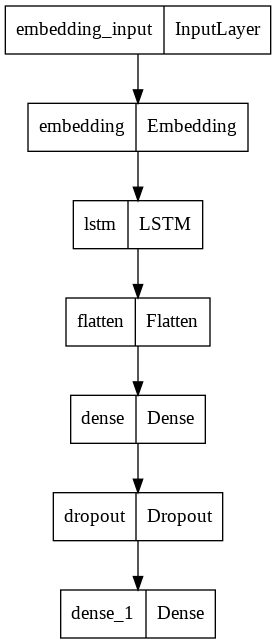

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()
keras.utils.plot_model(model)

In [ ]:
history = model.fit(np.array(padded_train), np.array(label_train), epochs=50, 
                    validation_data=(np.array(padded_test), np.array(label_test)), verbose=2, callbacks=[callbacks])

Epoch 1/50
56/56 - 1s - loss: 1.7231e-04 - accuracy: 1.0000 - val_loss: 0.6163 - val_accuracy: 0.8899 - 832ms/epoch - 15ms/step
Epoch 2/50
56/56 - 1s - loss: 1.1001e-04 - accuracy: 1.0000 - val_loss: 0.6193 - val_accuracy: 0.8876 - 739ms/epoch - 13ms/step
Epoch 3/50
56/56 - 1s - loss: 1.3098e-04 - accuracy: 1.0000 - val_loss: 0.6151 - val_accuracy: 0.8899 - 811ms/epoch - 14ms/step
Epoch 4/50
56/56 - 1s - loss: 1.1517e-04 - accuracy: 1.0000 - val_loss: 0.6145 - val_accuracy: 0.8921 - 839ms/epoch - 15ms/step
Epoch 5/50
56/56 - 1s - loss: 8.8351e-05 - accuracy: 1.0000 - val_loss: 0.6114 - val_accuracy: 0.8899 - 751ms/epoch - 13ms/step
Epoch 6/50
56/56 - 1s - loss: 1.1489e-04 - accuracy: 1.0000 - val_loss: 0.6145 - val_accuracy: 0.8899 - 764ms/epoch - 14ms/step
Epoch 7/50
56/56 - 1s - loss: 1.3134e-04 - accuracy: 1.0000 - val_loss: 0.6080 - val_accuracy: 0.8944 - 760ms/epoch - 14ms/step
Epoch 8/50
56/56 - 1s - loss: 1.6856e-04 - accuracy: 1.0000 - val_loss: 0.6071 - val_accuracy: 0.8966 - 

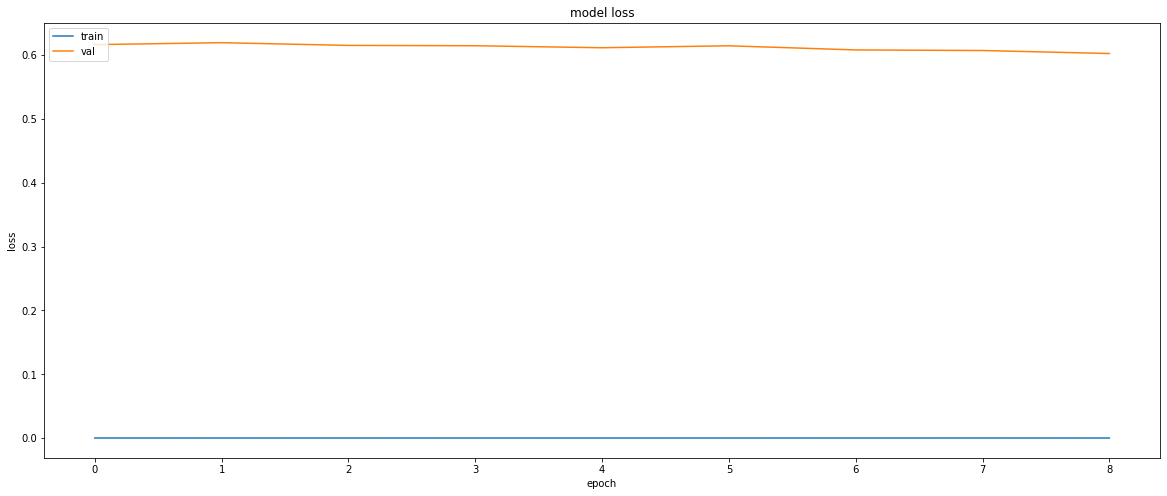

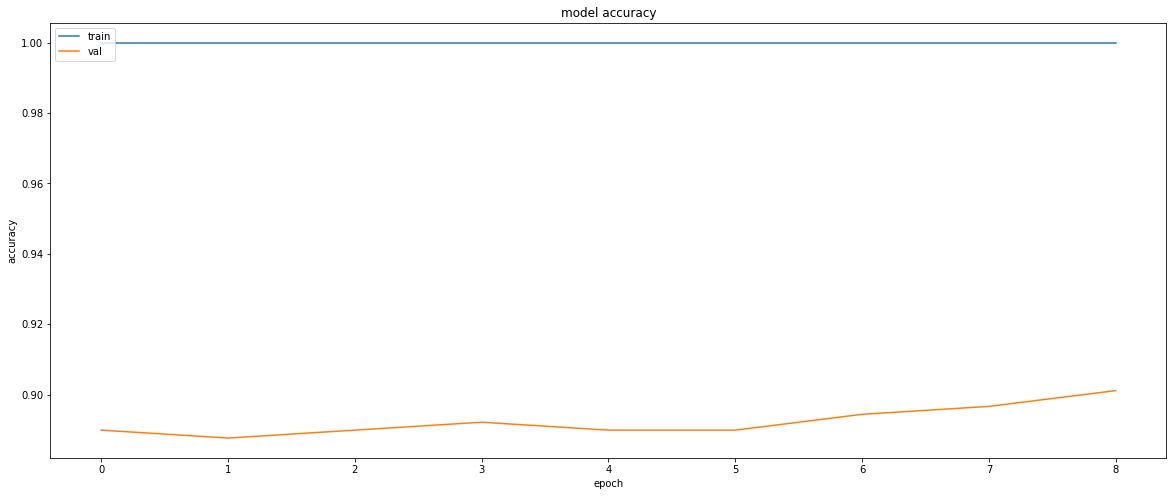

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()